### Langgraph Into

#### Langgraph
- Nodes
- Edges
- Function
- Stategraph 
- State
- invoke


In [33]:
import os


In [49]:

def function1(input1):
    return input1 + " This is from the Function 1,"

In [50]:
def function2(input2):
    return input2 + " This is from Function 2"

In [51]:
def function3(input3):
    pass

In [52]:
print(function1("hi,"))
print(function2("hello,"))

hi, This is from the Function 1,
hello, This is from Function 2


### Graph

In [53]:
from langgraph.graph import Graph

In [54]:
workflow1 = Graph()

In [55]:
workflow1

In [56]:
#Add the Nodes and Edges
workflow1.add_node("func1",function1)
workflow1.add_node("func2",function2)
# workflow1.add_node("func3",function3)

#Create the Edges
workflow1.add_edge("func1","func2")

## START and END
workflow1.set_entry_point("func1")
workflow1.set_finish_point("func2")


In [57]:
app = workflow1.compile()

In [58]:
app.get_graph()  #we will get the flow

Graph(nodes={'func1': Node(id='func1', name='func1', data=func1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'func2': Node(id='func2', name='func2', data=func2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='func1', data=None, conditional=False), Edge(source='func1', target='func2', data=None, conditional=False), Edge(source='func2', target='__end__', data=None, conditional=False)])

In [59]:
from IPython.display import Image,display

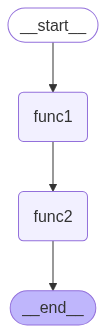

In [60]:
display(Image(app.get_graph().draw_mermaid_png()))

In [61]:
app.invoke("I am Mohan,")

'I am Mohan, This is from the Function 1, This is from Function 2'

In [63]:
for output in app.stream("I am Mohan,"):
    for key,value in output.items():
        print(f"here is the output from {key}")
        print("--"*50)
        print(value)
        print("\n")


here is the output from func1
----------------------------------------------------------------------------------------------------
I am Mohan, This is from the Function 1,


here is the output from func2
----------------------------------------------------------------------------------------------------
I am Mohan, This is from the Function 1, This is from Function 2




### Ex:-2

In [97]:
import os
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')
from langchain_groq import ChatGroq

In [ ]:
#Groq Model 
model = ChatGroq(model = "llama-3.1-8b-instant")
output = model.invoke("hi")
output.content

'How can I assist you today?'

In [ ]:
def llm(input):
    model = ChatGroq(model = "llama-3.1-8b-instant")
    output = model.invoke(input)
    return output.content
    

def token_counter(input):
    token = input.split()
    token_number = len(token)
    return f"Total Length  of the Token is:-{token_number}"



In [119]:
workflow2 = Graph() #Graph 

In [120]:
#Add the Nodes
workflow2.add_node("MY_LLM",llm)
workflow2.add_node("LLM_Output_Token_Counter",token_counter) 

In [121]:
### Add the Edges
workflow2.add_edge("MY_LLM","LLM_Output_Token_Counter")

In [122]:
##Add the Start and End Points
workflow2.set_entry_point("MY_LLM")
workflow2.set_finish_point("LLM_Output_Token_Counter")

In [123]:
workflow2

In [124]:
app2 = workflow2.compile()

- This will give the flow `get_graph`

In [125]:
app2.get_graph()

Graph(nodes={'MY_LLM': Node(id='MY_LLM', name='MY_LLM', data=MY_LLM(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'LLM_Output_Token_Counter': Node(id='LLM_Output_Token_Counter', name='LLM_Output_Token_Counter', data=LLM_Output_Token_Counter(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='MY_LLM', data=None, conditional=False), Edge(source='MY_LLM', target='LLM_Output_Token_Counter', data=None, conditional=False), Edge(source='LLM_Output_Token_Counter', target='__end__', data=None, conditional=False)])

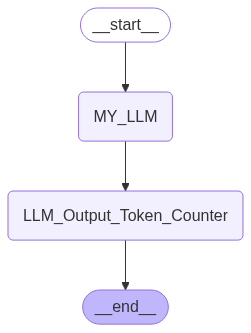

In [126]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [127]:
app2.invoke("what is this length?")

'Total Length  of the Token is:-25'

In [128]:
app2.invoke("Tell me about the Maruthi Suziki Car models?")

'Total Length  of the Token is:-315'

In [130]:
for output in app2.stream("Tell me about the Maruthi Suziki Car models?"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("----"*10)
        # print(key,"\n")
        print(value)
        print("\n")

here is output from MY_LLM
----------------------------------------
Maruti Suzuki is a Japanese multinational automotive manufacturer that has a significant presence in India, where it is a joint venture between Suzuki Motor Corporation and the Indian government's holding company, Maruti Udyog Limited. Here are some popular Maruti Suzuki car models:

**Hatchbacks:**

1. **Maruti Alto**: A compact hatchback, available in various trim levels, with a fuel-efficient engine option.
2. **Maruti Wagon R**: Known for its spacious interior and fuel efficiency, it is a popular choice in the Indian market.
3. **Maruti Swift**: A compact hatchback, known for its sporty design and strong performance.
4. **Maruti Baleno**: A premium hatchback, known for its stylish design, spacious interior, and feature-packed infotainment system.
5. **Maruti Ignis**: A compact crossover hatchback, known for its unique design and feature-packed infotainment system.

**Sedans:**

1. **Maruti Dzire**: A compact sedan,

In [133]:
for output in app2.stream("Tell me about the Maruthi Suziki Car models?"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("----"*10)
        print(key,"<----here is key \n")
        print(value)
        print("\n")

here is output from MY_LLM
----------------------------------------
MY_LLM <----here is key 

I think you meant to say Maruti Suzuki, not Maruthi Suzuki. Maruti Suzuki is a well-known Indian multinational automobile manufacturer. Here are some popular car models from Maruti Suzuki:

**Hatchbacks:**

1. **Maruti Suzuki Alto**: A popular entry-level hatchback, known for its affordability and fuel efficiency.
2. **Maruti Suzuki Wagon R**: A spacious and feature-packed hatchback with a large boot space.
3. **Maruti Suzuki Swift**: A compact and stylish hatchback, popular for its performance and handling.
4. **Maruti Suzuki Celerio**: A modern and feature-rich hatchback with a spacious interior.
5. **Maruti Suzuki Ignis**: A compact and stylish hatchback with a bold design.

**Sedans:**

1. **Maruti Suzuki Dzire**: A compact sedan with a spacious interior and a fuel-efficient engine.
2. **Maruti Suzuki Baleno**: A premium sedan with a feature-rich interior and a comfortable ride.
3. **Marut